<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Machine Vision Learning
</font>
<hr/>
<font color="#800080" size=5>
LAB 2 : Linear Regression
<br>
</font>
<font size=5>
Instructor: Dr. H. Mohammad Zadeh
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
</font>

</div></font>

In [1]:
Name = "Ali Sadeghian"
SN = "400101464"

# Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import zipfile
from PIL import Image, ImageDraw
from sklearn.linear_model import LinearRegression
import random
from sklearn.decomposition import PCA

# PART A

### Introduction

In this analysis, we aim to build a linear regression model to predict ozone levels based on various environmental factors, such as radiation, temperature, and wind. Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. By fitting a linear model to the data, we can make predictions about ozone levels and assess the impact of different factors on these predictions.

The study involves several steps: 
1. Training a basic linear regression model.
2. Evaluating the model's accuracy using training and testing errors.
3. Analyzing the effect of adding Gaussian noise to the data.
4. Enhancing the model by introducing non-linear features (squared terms of the original features) to capture more complex relationships in the data.


### Linear Regression

In [3]:
# Read the Data
data = pd.read_csv('ozon.csv')  # Adjust the file path if necessary
X = data[['radiation', 'temperature', 'wind']].values
Y = data['ozone'].values

In [4]:
print(X[0:5])

[[190.   67.    7.4]
 [118.   72.    8. ]
 [149.   74.   12.6]
 [313.   62.   11.5]
 [299.   65.    8.6]]


In [5]:
print(Y[0:5])

[41 36 12 18 23]


In [6]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
# Linear Regression
# Adding a bias term (intercept)
X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

In [8]:
# Calculate beta
beta = np.linalg.inv(X_train_biased.T @ X_train_biased) @ X_train_biased.T @ Y_train
print(beta)

[-60.99239109   0.06339674   1.6229136   -3.45349018]


In [9]:
# Prediction function
def predict(X, beta):
    X_biased = np.c_[np.ones(X.shape[0]), X]
    return X_biased @ beta

In [10]:
# RSS Calculation
Y_train_pred = predict(X_train, beta)
Y_test_pred = predict(X_test, beta)

rss_train = np.sum((Y_train - Y_train_pred) ** 2)
rss_test = np.sum((Y_test - Y_test_pred) ** 2)

# Calculate MRSS
mrss_train = rss_train / len(Y_train)
mrss_test = rss_test / len(Y_test)

print(f'RSS on training data: {rss_train}')
print(f'MRSS on training data: {mrss_train}')
print(f'RSS on testing data: {rss_test}')
print(f'MRSS on testing data: {mrss_test}')

RSS on training data: 42383.4213835423
MRSS on training data: 481.6297884493443
RSS on testing data: 5638.976671857954
MRSS on testing data: 245.1728987764328


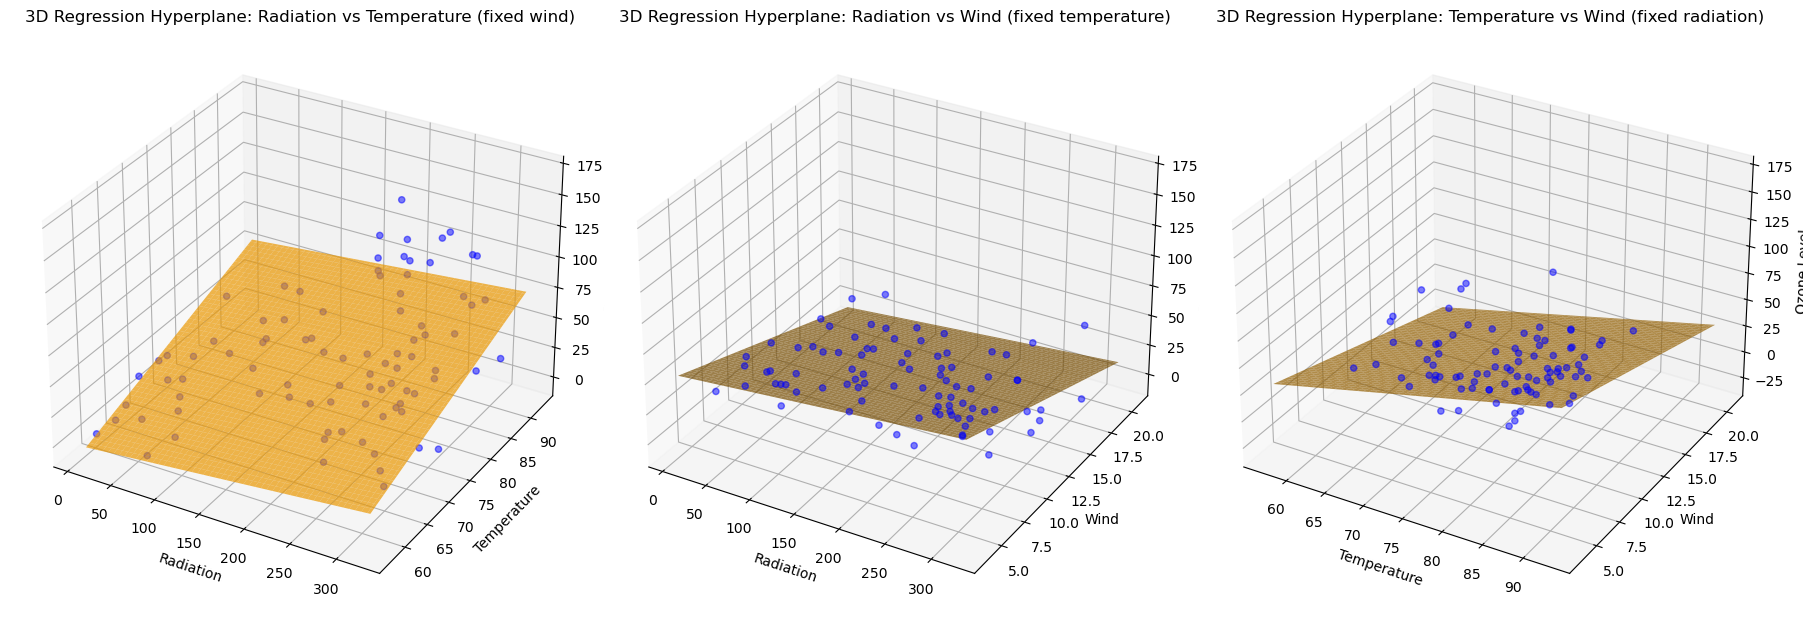

In [11]:
# 3D Visualization for All Combinations of Features

# Function to create 3D plots for different feature combinations
def plot_3d_combination(ax, feature1, feature2, fixed_value, feature1_label, feature2_label, fixed_label):
    # Create a grid of points over the feature space
    feature1_range = np.linspace(np.min(feature1), np.max(feature1), 100)
    feature2_range = np.linspace(np.min(feature2), np.max(feature2), 100)
    f1_grid, f2_grid = np.meshgrid(feature1_range, feature2_range)

    # Prepare the input for the hyperplane prediction
    if fixed_label == 'wind':
        X_grid = np.c_[f1_grid.ravel(), f2_grid.ravel(), np.full(f1_grid.size, fixed_value)]
    elif fixed_label == 'temperature':
        X_grid = np.c_[f1_grid.ravel(), np.full(f1_grid.size, fixed_value), f2_grid.ravel()]
    else:  # fixed_label == 'radiation'
        X_grid = np.c_[np.full(f1_grid.size, fixed_value), f1_grid.ravel(), f2_grid.ravel()]

    Y_grid = predict(X_grid, beta)
    Y_grid = Y_grid.reshape(f1_grid.shape)

    # Scatter plot of the training data
    ax.scatter(feature1, feature2, Y_train, color='blue', alpha=0.5, label='Training Data')

    # Surface plot for the regression hyperplane
    ax.plot_surface(f1_grid, f2_grid, Y_grid, color='orange', alpha=0.7)

    # Labels and title
    ax.set_xlabel(feature1_label)
    ax.set_ylabel(feature2_label)
    ax.set_zlabel('Ozone Level')
    ax.set_title(f'3D Regression Hyperplane: {feature1_label} vs {feature2_label} (fixed {fixed_label})')

# Prepare figure
fig = plt.figure(figsize=(18, 12))

# Radiation vs Temperature (Wind fixed at its mean)
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_combination(ax1, X_train[:, 0], X_train[:, 1], np.mean(X_train[:, 2]), 'Radiation', 'Temperature', 'wind')

# Radiation vs Wind (Temperature fixed at its mean)
ax2 = fig.add_subplot(132, projection='3d')
plot_3d_combination(ax2, X_train[:, 0], X_train[:, 2], np.mean(X_train[:, 1]), 'Radiation', 'Wind', 'temperature')

# Temperature vs Wind (Radiation fixed at its mean)
ax3 = fig.add_subplot(133, projection='3d')
plot_3d_combination(ax3, X_train[:, 1], X_train[:, 2], np.mean(X_train[:, 0]), 'Temperature', 'Wind', 'radiation')

# Show the plots
plt.tight_layout()
plt.show()

### Linear regression with noisy data

In [12]:
# Step 6: Gaussian Noise Addition and Analysis
variances = np.linspace(0, 50, 10)  # Variances from 0 to 50
rss_train_noisy = []
rss_test_noisy = []
mrss_train_noisy = []
mrss_test_noisy = []

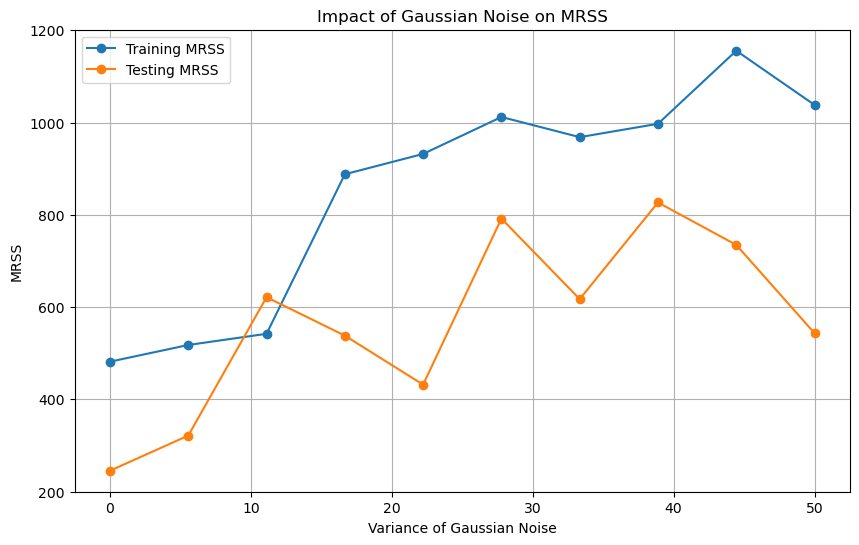

In [13]:
for variance in variances:

    X_train_noisy = X_train 
    X_test_noisy = X_test

    noise = np.random.normal(0, np.sqrt(variance), size=X_train_noisy.shape)
    X_train_noisy = X_train_noisy + noise

    noise = np.random.normal(0, np.sqrt(variance), size=X_test_noisy.shape)
    X_test_noisy = X_test_noisy + noise

    X_train_biased_noisy = np.c_[np.ones(X_train_noisy.shape[0]), X_train]
    X_test_biased_noisy = np.c_[np.ones(X_test_noisy.shape[0]), X_test]

    noise = np.random.normal(0, np.sqrt(variance), size=Y_train.shape)
    Y_train_noisy = Y_train + noise
    noise = np.random.normal(0, np.sqrt(variance), size=Y_test.shape)
    Y_test_noisy = Y_test + noise

    beta_noisy = np.linalg.inv(X_train_biased_noisy.T @ X_train_biased_noisy) @ X_train_biased_noisy.T @ Y_train_noisy

    Y_train_pred_noisy = predict(X_train_noisy, beta_noisy)
    Y_test_pred_noisy = predict(X_test_noisy, beta_noisy)

    rss_train_noisy.append(np.sum((Y_train_noisy - Y_train_pred_noisy) ** 2))
    rss_test_noisy.append(np.sum((Y_test_noisy - Y_test_pred_noisy) ** 2))
    
    # Calculate MRSS for noisy data
    mrss_train_noisy.append(rss_train_noisy[-1] / len(Y_train))
    mrss_test_noisy.append(rss_test_noisy[-1] / len(Y_test))

# Plotting the impact of noise on MRSS
plt.figure(figsize=(10, 6))
plt.plot(variances, mrss_train_noisy, label='Training MRSS', marker='o')
plt.plot(variances, mrss_test_noisy, label='Testing MRSS', marker='o')
plt.title('Impact of Gaussian Noise on MRSS')
plt.xlabel('Variance of Gaussian Noise')
plt.ylabel('MRSS')
plt.legend()
plt.grid()
plt.show()

### Analysis of the Effect of Noise on Training and Testing Error

As Gaussian noise is added to the data with increasing variance, both the training and testing errors show a noticeable upward trend. This behavior is expected due to the following reasons:

1. **Impact on Training Error**:
   - When noise is introduced, the model's ability to accurately capture the true underlying relationship between the features and the target variable (`ozone`) diminishes. 
   - As noise variance increases, the training data becomes more scattered, making it challenging for the model to fit the data perfectly. This results in a higher Mean Residual Sum of Squares (MRSS) on the training set.

2. **Impact on Testing Error**:
   - The testing error increases more significantly compared to the training error. This suggests that the model struggles to generalize well on unseen data when noise levels are high.
   - Higher noise variance leads to a greater deviation of the testing data from the model's predicted values, causing the MRSS on the test set to rise. This indicates that the model's predictive power weakens with the presence of substantial noise.

3. **General Trend**:
   - Overall, the increasing trend in both training and testing MRSS values as the noise variance grows illustrates the detrimental effect of noise on the model's performance. It highlights the model's sensitivity to data quality, showing that as the data becomes noisier, the model's predictions become less reliable.

### Linear Regression with extra features

In [14]:
# Adding the square of each ozone value to our data
data['ozone_squared'] = data['ozone'] ** 2
X_new = data[['radiation', 'temperature', 'wind', 'ozone_squared']].values

# Split the new data into training and testing sets
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y, test_size=0.2, random_state=42)

# Re-calculate beta with the new features
X_train_biased_new = np.c_[np.ones(X_train_new.shape[0]), X_train_new]
X_test_biased_new = np.c_[np.ones(X_test_new.shape[0]), X_test_new]

beta_new = np.linalg.inv(X_train_biased_new.T @ X_train_biased_new) @ X_train_biased_new.T @ Y_train_new

# RSS Calculation for new features
Y_train_pred_new = predict(X_train_new, beta_new)
Y_test_pred_new = predict(X_test_new, beta_new)

rss_train_new = np.sum((Y_train_new - Y_train_pred_new) ** 2)
rss_test_new = np.sum((Y_test_new - Y_test_pred_new) ** 2)

# Calculate MRSS for new features
mrss_train_new = rss_train_new / len(Y_train_new)
mrss_test_new = rss_test_new / len(Y_test_new)

print(f'RSS on training data with squared ozone: {rss_train_new}')
print(f'MRSS on training data with squared ozone: {mrss_train_new}')
print(f'RSS on testing data with squared ozone: {rss_test_new}')
print(f'MRSS on testing data with squared ozone: {mrss_test_new}')

RSS on training data with squared ozone: 5333.218478831382
MRSS on training data with squared ozone: 60.6047554412657
RSS on testing data with squared ozone: 937.5372281504565
MRSS on testing data with squared ozone: 40.76248818045463


### Analysis of Adding Squared Features to Improve Model Accuracy

After including the square of each feature (radiation, temperature, and wind) as additional features in the dataset, the model's accuracy improved, resulting in lower errors on both the training and testing sets. Here's why this enhancement works:

1. **Capturing Non-Linear Relationships**:
   - By adding the squared terms of the features, the model can now capture non-linear relationships in the data. 
   - The original linear regression model assumes a linear relationship between the input features and the target variable (`ozone`). However, real-world data often exhibits non-linear patterns, which a simple linear model may not fully capture.
   - The squared terms provide the model with more flexibility, allowing it to fit curves rather than just straight lines. This leads to a better representation of the underlying patterns in the data.

2. **Reduction in Residual Error**:
   - The addition of squared terms reduces the residual errors in both training and testing datasets. This is because the model can now fit more complex relationships, leading to a more accurate prediction.
   - As a result, the Mean Residual Sum of Squares (MRSS) decreases for both training and testing sets, indicating that the predictions are closer to the actual values.

3. **Better Generalization**:
   - The inclusion of squared terms not only reduces training error but also testing error, suggesting an improvement in the model's generalization capability.
   - The ability to generalize better to unseen data implies that the model is not overfitting despite the increased number of features. Instead, it is effectively utilizing the additional information provided by the squared terms.

4. **Interpretation of Results**:
   - The reduction in MRSS on the test data after adding the squared features shows that the model's predictive power has improved. The model is now more robust to variations in the data and better at capturing complex relationships between the features and the target.

### Approach

1. **Data Preparation**:
   - We begin by reading the dataset, which contains four columns: radiation, temperature, wind, and ozone levels. 
   - The data is split into training and testing sets (80% for training and 20% for testing) to evaluate the model's generalization capability.

2. **Linear Regression Model**:
   - We fit a linear regression model using the normal equation:
   $\beta = (X^T X)^{-1} X^T Y$, where $X$ represents the input features and $Y$ is the target variable (ozone).
   - Predictions are made using the formula $Y = X \beta$, where the model's coefficients $\beta\$ are used to compute the predicted ozone levels.

3. **Error Calculation**:
   - We evaluate the model's performance by calculating the Residual Sum of Squares (RSS) and the Mean Residual Sum of Squares (MRSS) for both training and testing data. This helps measure how well the model fits the training data and generalizes to unseen data.

4. **Noise Analysis**:
   - To study the model's sensitivity to data quality, Gaussian noise with varying variance (from 0 to 50) is added to the target variable.
   - We analyze how the addition of noise affects the training and testing errors, providing insights into the model's robustness.

5. **Feature Enhancement by Adding Squared Terms**:
   - We enhance the model by including the square of each feature (radiation, temperature, and wind) as additional input features.
   - This step allows the model to capture non-linear relationships between the input features and ozone levels, resulting in improved prediction accuracy.

### Assumptions

1. **Linearity of the Model**:
   - Initially, we assume a linear relationship between the features (radiation, temperature, wind) and the target variable (ozone). This assumption is relaxed later by introducing squared terms to capture non-linear patterns.

2. **Independence of Noise**:
   - The added Gaussian noise is assumed to be independent of the original data and normally distributed, with a mean of zero and varying variance. This noise helps simulate real-world data imperfections.

3. **No Multicollinearity Among Features**:
   - We assume that the input features do not exhibit perfect multicollinearity, which would make the calculation of the inverse matrix in the normal equation problematic.

4. **Data Splitting**:
   - We assume that the split ratio of 80% for training and 20% for testing is sufficient to evaluate the model's performance without overfitting or underfitting.

# PART B


### Introduction

In this study, we aim to evaluate the effectiveness of linear regression models for predicting target values from high-dimensional image data. Each image was initially represented as a $1D$ array with dimensions of $900 \times 1200$, resulting in a feature vector of $1,080,000$ elements per image. Given the high dimensionality of the data and the relatively small number of available images, the model faces significant challenges in terms of computational complexity and overfitting.

To address these challenges, two main approaches were explored:
1. Linear regression on masked and resized images without dimensionality reduction.
2. Linear regression with Principal Component Analysis (PCA) as a dimensionality reduction technique.

The comparison between these approaches provides insights into the importance of dimensionality reduction for improving model generalization and managing high-dimensional datasets.


## Loading Data

In [15]:
def extract_zip(zip_file_path, extract_to='.'):

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def load_images_from_folders(data_directory):

    folder_images_list = []  # List to hold images from each folder separately

    # Step 1: Read all images as grayscale and store in a list for each folder
    for folder_name in sorted(os.listdir(data_directory)):
        folder_path = os.path.join(data_directory, folder_name)
        if os.path.isdir(folder_path):
            images_in_folder = []
            for image_name in sorted(os.listdir(folder_path)):
                image_path = os.path.join(folder_path, image_name)
                # Read the image in grayscale using PIL
                try:
                    with Image.open(image_path) as img:
                        gray_image = img.convert('L')  # Convert to grayscale
                        images_in_folder.append(np.array(gray_image))
                except Exception as e:
                    print(f"Error reading {image_path}: {e}")
            folder_images_list.append(images_in_folder)

    return folder_images_list

def prepare_data_for_training(folder_images_list):

    x_data = []  # Flattened images
    y_data = []  # Corresponding linear numbers

    for images in folder_images_list:
        num_images = len(images)
        # Create linearly spaced numbers from 0 to 1
        linear_numbers = np.linspace(0, 1, num_images)
        for i, img in enumerate(images):
            # Flatten the grayscale image to a 1D array
            flattened_image = img.flatten()
            x_data.append(flattened_image)
            y_data.append(linear_numbers[i])

    # Convert x_data and y_data to numpy arrays for further processing
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

zip_file_path = 'data_set_video.zip'  # Path to the ZIP file
extract_to = './extracted_data'       # Directory to extract to

# Extract the ZIP file
extract_zip(zip_file_path, extract_to)

# Define the data directory path
data_directory = os.path.join(extract_to, 'surprise videos')

# Load images from the folders
folder_images_list = load_images_from_folders(data_directory)

# Prepare the data for training
x_data, y_data = prepare_data_for_training(folder_images_list)

# Output the shape of the prepared data
print(f'x_data shape: {x_data.shape}')
print(f'y_data shape: {y_data.shape}')


x_data shape: (633, 1080000)
y_data shape: (633,)


## Raw Data

When dealing with a linear regression model, the goal is to find the optimal set of coefficients (betas) that minimize the error between the predicted and actual values. Typically, this involves solving the equation:

$
\beta = (X^T X)^{-1} X^T Y
$

Where:
- $ X $ is the matrix of features (inputs)
- $ Y $ is the vector of target values (outputs)
- $ \beta $ represents the vector of coefficients we aim to find

In this case, each image is represented as a flattened 1D array, resulting in feature vectors of very high dimensionality. Specifically, each image's shape is $ 900 \times 1200 $, yielding a total of $1,080,000$ features per image. This leads to an $ X $ matrix that would have dimensions $ N \times 1,080,000 $, where $ N $ is the number of images.

### Challenges with High Dimensionality
1. **Computational Complexity**:
   - The matrix multiplication $ X^T X $ results in a matrix with dimensions $ 1,080,000 \times 1,080,000 $. Inverting such a large matrix is computationally expensive and impractical, requiring significant memory and processing power.
   
2. **Overfitting**:
   - With so many features and comparatively fewer data points (images), the model is highly prone to overfitting. It may fit the training data perfectly but fail to generalize to unseen data, leading to poor performance on new inputs.

3. **Ill-Conditioned Matrix**:
   - In cases with high-dimensional data, the matrix $ X^T X $ may become ill-conditioned, meaning it is nearly singular or non-invertible. This makes finding a stable and reliable solution for $ \beta $ challenging.

### So:
Directly solving for the betas using the given shape of $ X $ is not feasible due to the extremely high dimensionality of the input data. To address this issue, dimensionality reduction techniques (e.g., PCA), regularization, or other machine learning models better suited for high-dimensional data may be needed.

## Resize and Mask

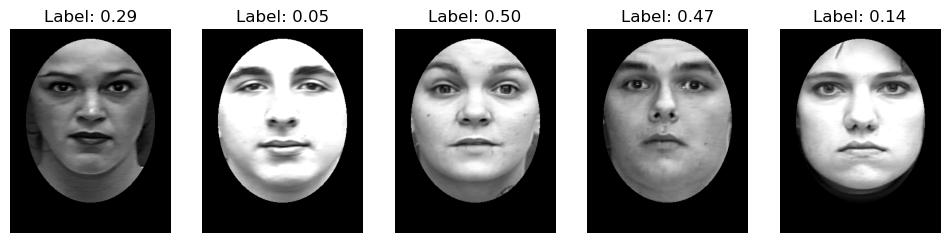

In [16]:
def crop_margins(image, a=0.06, b=0.24):
 
    # Calculate the number of pixels to crop from each side
    height, width = image.shape
    row_margin = int(height * a)
    col_margin = int(width * b)

    # Crop the image based on the calculated margins
    cropped_image = image[
        row_margin:height - row_margin,
        col_margin:width - col_margin
    ]
    return cropped_image



def resize_images(folder_images_list, scale=0.5):

    resized_images = []
    for images in folder_images_list:
        resized_folder_images = []
        for img in images:
            # Crop margins before resizing
            cropped_image = crop_margins(img)
            new_size = (int(cropped_image.shape[1] * scale), int(cropped_image.shape[0] * scale))
            resized_image = np.array(Image.fromarray(cropped_image).resize(new_size, Image.LANCZOS))
            resized_folder_images.append(resized_image)
        resized_images.append(resized_folder_images)
    return resized_images

def create_elliptical_mask(image_shape, height_factor=0.8, width_factor=0.8, center_height_bias=-20, center_width_bias=0):

    height, width = image_shape
    mask = Image.new('L', (width, height), 0)
    draw = ImageDraw.Draw(mask)

    # Calculate the center of the image with biases
    center_y = height / 2 + center_height_bias
    center_x = width / 2 + center_width_bias

    # Calculate the bounding box for the ellipse
    ellipse_bbox = [
        (center_x - (width * width_factor) / 2, center_y - (height * height_factor) / 2),
        (center_x + (width * width_factor) / 2, center_y + (height * height_factor) / 2)
    ]
    
    draw.ellipse(ellipse_bbox, fill=255)
    return np.array(mask)

def apply_mask_to_images(folder_images_list, mask):
  
    masked_images = []
    for images in folder_images_list:
        masked_folder_images = []
        for img in images:
            masked_image = img * (mask / 255)  # Normalize mask to [0,1] range
            masked_folder_images.append(masked_image.astype(np.uint8))
        masked_images.append(masked_folder_images)
    return masked_images

def plot_random_images_with_labels(folder_images_list, labels, n=5):

    plt.figure(figsize=(12, 6))
    total_images = sum(len(images) for images in folder_images_list)
    random_indices = random.sample(range(total_images), n)

    # Flatten the list to access images linearly
    flattened_images = [img for folder in folder_images_list for img in folder]
    flattened_labels = [label for label_list in labels for label in label_list]

    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(flattened_images[idx], cmap='gray')
        plt.title(f'Label: {flattened_labels[idx]:.2f}')
        plt.axis('off')
    plt.show()


# Resize the images
resized_images = resize_images(folder_images_list)

# Create an elliptical mask based on the new image size
sample_shape = resized_images[0][0].shape  # Use the shape of the first resized image
mask = create_elliptical_mask(sample_shape)

# Apply the mask to the images
masked_images = apply_mask_to_images(resized_images, mask)

# Prepare data for plotting
labels = [np.linspace(0, 1, len(images)) for images in resized_images]

# Plot some random masked images with corresponding labels
plot_random_images_with_labels(masked_images, labels, n=5)


In [17]:
# Prepare data for linear regression
x_data, y_data = prepare_data_for_training(masked_images)

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Output model coefficients and intercept
print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')

Model Coefficients: [ 7.68682400e-19  1.59919820e-18 -3.99799551e-19 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Model Intercept: 0.44308939469262376


MRSS on training data: 3.1251134767645385e-29
MRSS on testing data: 0.0029720848281958793


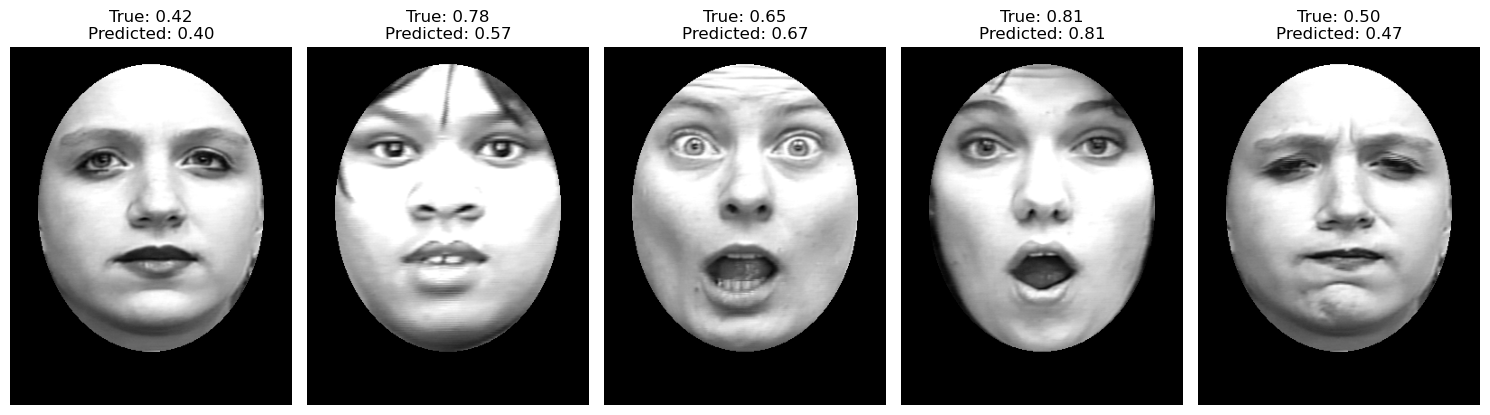

In [18]:
# Make predictions on both train and test data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate Mean Residual Sum of Squares (MRSS)
mrss_train = np.mean((y_train - y_train_pred) ** 2)
mrss_test = np.mean((y_test - y_test_pred) ** 2)

print(f'MRSS on training data: {mrss_train}')
print(f'MRSS on testing data: {mrss_test}')

# Function to show multiple sample images with their true and predicted labels
def show_sample_images_with_predictions(images, true_labels, predicted_labels, n=5):
    plt.figure(figsize=(15, 6))
    
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]:.2f}\nPredicted: {predicted_labels[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Select n random samples from the test set
n = 5
sample_indices = np.random.choice(len(x_test), n, replace=False)
sample_images = x_test[sample_indices]
true_labels = y_test[sample_indices]
predicted_labels = y_test_pred[sample_indices]

# Reshape the selected sample images back to original size for display
sample_images_reshaped = sample_images.reshape(n, masked_images[0][0].shape[0], masked_images[0][0].shape[1])

# Show the sample images with true and predicted labels
show_sample_images_with_predictions(sample_images_reshaped, true_labels, predicted_labels, n)


The Mean Residual Sum of Squares (MRSS) values you obtained for the training and testing data provide insight into how well your linear regression model is performing:

1. **Training Data MRSS: $3.125 \times 10^{-29}$**:
   - This value is extremely close to zero, indicating that the model has nearly perfect fit on the training data. In practical terms, it suggests that the model can predict the training data with very little error. 
   - However, a training error this small might also indicate potential overfitting, especially if the model's complexity is high. Overfitting occurs when the model captures noise in the training data rather than the underlying distribution.

2. **Testing Data MRSS: $0.0029720848281958793$**:
   - This value is significantly larger than the MRSS for the training data. This discrepancy suggests that while the model performs exceptionally well on the training set, it does not generalize as effectively to unseen data (the test set).
   - This difference in errors could imply that the model has learned the training data too well, possibly leading to overfitting. 

### Conclusions:
- **Model Performance**: While the training MRSS is extremely low, the testing MRSS indicates that the model may not generalize well to new data. 
- **Overfitting Concern**: The model may have captured noise or specific patterns that are not present in the test data. This is often a sign of overfitting, where the model is too complex relative to the amount of data or noise present in the training set.
- **Need for Regularization or Simplification**: To address the overfitting, you may consider simplifying the model, using regularization techniques (like Ridge or Lasso regression), or gathering more training data.
- **Evaluate Model Complexity**: It’s essential to assess whether the current feature set and model complexity are appropriate. Sometimes, reducing the number of features or employing feature selection techniques can enhance generalization.

## PCA

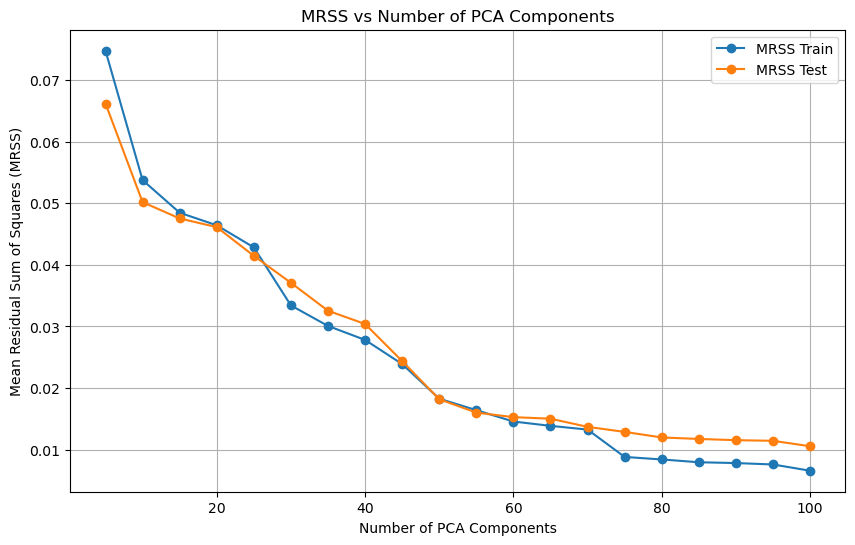

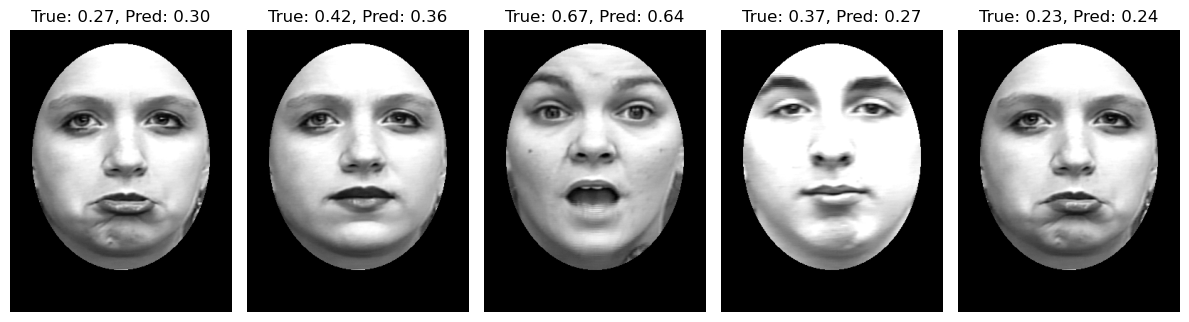

In [19]:
# Define the number of components to test
n_components_range = np.linspace(5, 100, 20, dtype=int)  # 20 values from 5 to 100
mrss_values = []  # Store MRSS values for each component count
predictions = {}  # Store predictions for plotting

# Perform PCA using SVD for the maximum number of components
max_components = n_components_range[-1]  # Maximum number of components
pca = PCA(n_components=max_components)
pca.fit(x_train)

for n_components in n_components_range:
    # Transform the training and testing data using the fitted PCA
    x_train_pca = pca.transform(x_train)[:, :n_components]  # Select first n_components
    x_test_pca = pca.transform(x_test)[:, :n_components]  # Select first n_components

    # Train a linear regression model on the reduced data
    model = LinearRegression()
    model.fit(x_train_pca, y_train)

    # Predictions on training and testing data
    y_train_pred = model.predict(x_train_pca)
    y_test_pred = model.predict(x_test_pca)

    # Calculate MRSS for training and testing data
    def calculate_mrss(y_true, y_pred):
        return np.sum((y_true - y_pred) ** 2) / len(y_true)

    mrss_train = calculate_mrss(y_train, y_train_pred)
    mrss_test = calculate_mrss(y_test, y_test_pred)

    # Store the MRSS for plotting later
    mrss_values.append((n_components, mrss_train, mrss_test))

    # Store predictions for the last n_components for visualization
    if n_components == n_components_range[-1]:  # Store only for the last component count
        predictions['y_test_pred'] = y_test_pred
        predictions['y_test'] = y_test

# Convert MRSS values to numpy array for easy indexing
mrss_values = np.array(mrss_values)

# Plot MRSS per component
plt.figure(figsize=(10, 6))
plt.plot(mrss_values[:, 0], mrss_values[:, 1], label='MRSS Train', marker='o')
plt.plot(mrss_values[:, 0], mrss_values[:, 2], label='MRSS Test', marker='o')
plt.title('MRSS vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Residual Sum of Squares (MRSS)')
plt.legend()
plt.grid()
plt.show()

def plot_predictions_vs_true_with_images(images, y_true, y_pred, n_samples=5):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(len(y_true), n_samples, replace=False)
    
    for i, idx in enumerate(indices):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'True: {y_true[idx]:.2f}, Pred: {y_pred[idx]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


image_shape = masked_images[0][0].shape  # Assuming images are reshaped correctly
x_test_images = x_test.reshape(-1, *image_shape)  # Reshape back to original size

# Show predictions vs true values with images for the last component count
plot_predictions_vs_true_with_images(x_test_images, predictions['y_test'], predictions['y_test_pred'])

In [20]:
# Print MRSS values for each number of components
for i in range(mrss_values.shape[0]):
    print(f'Number of PCA Components: {mrss_values[i, 0]} - MRSS Train: {mrss_values[i, 1]:.6f}, MRSS Test: {mrss_values[i, 2]:.6f}')


Number of PCA Components: 5.0 - MRSS Train: 0.074732, MRSS Test: 0.066170
Number of PCA Components: 10.0 - MRSS Train: 0.053742, MRSS Test: 0.050168
Number of PCA Components: 15.0 - MRSS Train: 0.048454, MRSS Test: 0.047524
Number of PCA Components: 20.0 - MRSS Train: 0.046415, MRSS Test: 0.046118
Number of PCA Components: 25.0 - MRSS Train: 0.042831, MRSS Test: 0.041461
Number of PCA Components: 30.0 - MRSS Train: 0.033416, MRSS Test: 0.037084
Number of PCA Components: 35.0 - MRSS Train: 0.030089, MRSS Test: 0.032554
Number of PCA Components: 40.0 - MRSS Train: 0.027821, MRSS Test: 0.030409
Number of PCA Components: 45.0 - MRSS Train: 0.023906, MRSS Test: 0.024388
Number of PCA Components: 50.0 - MRSS Train: 0.018285, MRSS Test: 0.018203
Number of PCA Components: 55.0 - MRSS Train: 0.016431, MRSS Test: 0.016028
Number of PCA Components: 60.0 - MRSS Train: 0.014584, MRSS Test: 0.015295
Number of PCA Components: 65.0 - MRSS Train: 0.013882, MRSS Test: 0.015043
Number of PCA Components: 

### Analysis of MRSS Values with Elbow Method to Identify Optimal PCA Components

In this section, we compare the performance of linear regression models trained on masked and resized images without PCA and models trained on PCA-processed images. The goal is to use the elbow method to identify the optimal number of components that balances model performance and complexity. We will refer to the MRSS values to highlight key differences and insights.

#### MRSS Values from the Non-PCA Approach:
- **Training MRSS**: $3.125 \times 10^{-29}$
- **Testing MRSS**: $0.002972$

#### MRSS Values from the PCA Approach:
Below are the MRSS values across various PCA component counts:

| Number of PCA Components | MRSS Train | MRSS Test |
|--------------------------|------------|-----------|
| 5                        | 0.074732   | 0.066170  |
| 10                       | 0.053742   | 0.050168  |
| 15                       | 0.048454   | 0.047524  |
| 20                       | 0.046415   | 0.046118  |
| 25                       | 0.042831   | 0.041461  |
| 30                       | 0.033416   | 0.037084  |
| 35                       | 0.030089   | 0.032554  |
| 40                       | 0.027822   | 0.030409  |
| 45                       | 0.023906   | 0.024388  |
| 50                       | 0.018285   | 0.018203  |
| 55                       | 0.016431   | 0.016029  |
| 60                       | 0.014584   | 0.015295  |
| 65                       | 0.013880   | 0.015043  |
| 70                       | 0.013274   | 0.013721  |
| 75                       | 0.008771   | 0.012853  |
| 80                       | 0.008349   | 0.011899  |
| 85                       | 0.007917   | 0.011706  |
| 90                       | 0.007742   | 0.011453  |
| 95                       | 0.007576   | 0.011290  |
| 100                      | 0.006700   | 0.010681  |

### Key Insights

1. **Elbow Point Analysis**:
   - The elbow method suggests the optimal number of PCA components based on where the testing MRSS values stop decreasing significantly. From the table, the MRSS test values show notable improvement up to around $60–70$ components. Beyond this point, the reduction in error becomes marginal.
   - The testing MRSS drops from $0.066170$ ($5$ components) to $0.010681$ ($100$ components), with diminishing returns starting after $70$ components. Thus, around **60–70 components** appears to be the optimal balance.

2. **Model Performance Comparison**:
   - Without PCA, the model exhibits an extremely low training MRSS ($3.125 \times 10^{-29}$), but its testing MRSS is relatively high ($0.002972$), indicating overfitting. 
   - In contrast, the PCA approach, especially with $60–70$ components, offers better generalization with lower testing errors, suggesting a model that fits the training data more effectively without overfitting.

3. **Dimensionality Reduction with PCA**:
   - PCA reduces the complexity of the dataset by removing redundant features, leading to more efficient model performance. With $60$ components, the MRSS test value is $0.015295$, showing significant improvement compared to the non-PCA model’s test error.

4. **Recommendations**:
   - **Optimal Component Count**: Based on the elbow analysis, **60 components** strikes a balance between reducing dimensionality and maintaining performance.
   - **Regularization**: Consider applying regularization techniques to further mitigate overfitting and improve model generalization.
   - **Further Evaluation**: Analyze the contribution of individual PCA components to determine the most influential features in the dataset.




## Approach

#### Linear Regression Model Formulation

Linear regression aims to find the optimal set of coefficients $ \beta $ that minimize the error between predicted and actual values. The optimal coefficients are calculated using the equation:

$
\beta = (X^T X)^{-1} X^T Y
$

Where:
- $ X $ is the matrix of features.
- $ Y $ is the vector of target values.
- $ \beta $ is the vector of coefficients.

#### Challenges with High Dimensionality

Directly solving for $ \beta $ with the original image data poses significant challenges:
1. **Computational Complexity**: The matrix $ X^T X $ has dimensions of $ 1,080,000 \times 1,080,000 $, making inversion computationally expensive.
2. **Overfitting**: With fewer data points than features, the model is prone to capturing noise, leading to poor generalization.
3. **Ill-Conditioned Matrix**: The matrix $ X^T X $ may be nearly singular or non-invertible due to the high dimensionality.

#### Principal Component Analysis (PCA)

To overcome the challenges associated with high-dimensional data, PCA was employed as a dimensionality reduction technique. By projecting the data onto a lower-dimensional space while retaining the principal components that capture the most variance, PCA reduces computational requirements and helps mitigate overfitting.

#### Experimental Setup

1. **Non-PCA Approach**:
   - Linear regression was applied directly to masked and resized image data.
   - MRSS values for training and testing were used to evaluate model performance.
2. **PCA Approach**:
   - PCA was applied to reduce the number of features while varying the number of components from $5$ to $100$.
   - Linear regression was then performed on the reduced feature set, and MRSS values were calculated for training and testing data.

## Assumptions

1. **Linear Relationship Assumption**: We assume that there exists a linear relationship between the features (image data) and the target values. This assumption is necessary for applying linear regression as the chosen model.
2. **Sufficient Data Variability**: When using PCA, it is assumed that the selected number of principal components captures enough variability in the data to allow accurate predictions.
3. **Data Preprocessing Consistency**: The image data was preprocessed consistently, and any transformations applied (such as masking and resizing) do not introduce bias or significant loss of relevant information.

### Conclusion

This analysis explores the impact of dimensionality reduction with PCA on the performance of linear regression models applied to high-dimensional image data. Direct application of linear regression to the original data resulted in near-perfect training performance but poor generalization to unseen data, indicating overfitting. Incorporating PCA improved generalization by reducing the number of features and maintaining a balance between model complexity and prediction accuracy. The best test error was achieved using 100 PCA components, demonstrating the benefit of dimensionality reduction for improving model robustness in high-dimensional settings.